In [71]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import load_model
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [72]:
images = np.load("./images.npy")
images = np.reshape(images, (len(images), 28 * 28))

labels = np.load("./labels.npy")

In [73]:
seed = 42
np.random.seed(seed)

In [74]:
print(images.shape)
print(labels.shape)

(6500, 784)
(6500,)


In [75]:
labels = tf.keras.utils.to_categorical(labels)

In [76]:
labels.shape

(6500, 10)

## Model Spplitting (Train, Validation, Test)

In [77]:
# training = 60%, validation = 15%, testing = 25%

In [78]:
x_train, x_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.40, random_state=seed, stratify=labels
)
x_test, x_validation, y_test, y_validation = train_test_split(
    x_test, y_test, test_size=0.375, random_state=seed, stratify=y_test
)
print(x_train.shape)
print(x_validation.shape)
print(x_test.shape)

(3900, 784)
(975, 784)
(1625, 784)


## Model Selection

In [79]:
# Documentation: https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
# model = Sequential() # declare model
# model.add(Dense(10, input_shape=(28*28, ), kernel_initializer='he_normal')) # first layer
# model.add(Activation('relu'))

In [80]:
# Our Model
# model.add(Dense(100, kernel_initializer='random_uniform')) # third layer
# model.add(Activation('relu'))
# model.add(Dense(100, kernel_initializer='random_normal')) # second layer
# model.add(Activation('relu'))
# model.add(Dense(100, kernel_initializer='random_uniform')) # third layer
# model.add(Activation('relu'))
# model.add(Dense(100, kernel_initializer='random_normal')) # second layer
# model.add(Activation('relu'))
# model.add(Dense(100, kernel_initializer='random_uniform')) # third layer
# model.add(Activation('relu'))
# model.add(Dense(100, kernel_initializer='random_normal')) # second layer
# model.add(Activation('relu'))
# model.add(Dense(50, kernel_initializer='random_uniform')) # fourth layer
# model.add(Activation('tanh'))

In [81]:
# model.add(Dense(10, kernel_initializer='he_normal')) # last layer
# model.add(Activation('softmax'))

In [82]:
# Compile Model
# model.compile(optimizer='sgd',
#               loss='categorical_crossentropy', 
#               metrics=['accuracy'])

In [162]:
model = load_model("best_trained_model.h5")

In [163]:
# Train Model
history = model.fit(
    x_train,
    y_train,
    validation_data=(x_validation, y_validation),
    epochs=100,
    batch_size=128,
)

Epoch 1/100
31/31 [==============================] - 1s 10ms/step - loss: 0.0095 - accuracy: 0.9990 - val_loss: 0.5451 - val_accuracy: 0.8513
Epoch 2/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0094 - accuracy: 0.9990 - val_loss: 0.5434 - val_accuracy: 0.8523
Epoch 3/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0093 - accuracy: 0.9990 - val_loss: 0.5455 - val_accuracy: 0.8544
Epoch 4/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0091 - accuracy: 0.9992 - val_loss: 0.5447 - val_accuracy: 0.8523
Epoch 5/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0089 - accuracy: 0.9992 - val_loss: 0.5435 - val_accuracy: 0.8533
Epoch 6/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0088 - accuracy: 0.9992 - val_loss: 0.5465 - val_accuracy: 0.8513
Epoch 7/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0087 - accuracy: 0.9992 - val_loss: 0.5498 - val_accuracy: 0.8533
Epoch 8/100


In [178]:
# Accuracy and Loss
print(history.history)

plt.plot(
    range(len(history.history.get("accuracy"))),
    history.history.get("accuracy"),
    label="accuracy",
)
plt.plot(
    range(len(history.history.get("val_accuracy"))),
    history.history.get("val_accuracy"),
    label="validation accuracy",
)
ax = plt.gca()
ax.set_ylim([0.75, 1.05])
plt.legend(loc="lower right")
plt.xlabel("epoch")
plt.ylabel("accuracy")

plt.savefig("accuracy.png")

plt.clf()

plt.plot(
    range(len(history.history.get("loss"))), history.history.get("loss"), label="loss"
)
plt.plot(
    range(len(history.history.get("val_loss"))),
    history.history.get("val_loss"),
    label="validation_loss",
)
plt.legend(loc="upper right")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.savefig("loss.png")

plt.clf()

{'loss': [0.009521586820483208, 0.009396316483616829, 0.009293576702475548, 0.0090654157102108, 0.008921119384467602, 0.00879722647368908, 0.008676903322339058, 0.00858076848089695, 0.008477109484374523, 0.008380201645195484, 0.008299189619719982, 0.008210940286517143, 0.008102822117507458, 0.007984445430338383, 0.007867523469030857, 0.007786603178828955, 0.007727041840553284, 0.007633035071194172, 0.007539893034845591, 0.007479695603251457, 0.007394228596240282, 0.0073288194835186005, 0.007274121046066284, 0.007198985666036606, 0.007143617607653141, 0.007071190048009157, 0.007006268948316574, 0.006946269888430834, 0.006882003508508205, 0.006828718818724155, 0.006758108735084534, 0.006708781234920025, 0.006650228053331375, 0.006600138731300831, 0.006551796570420265, 0.006497462745755911, 0.006445596925914288, 0.006398878991603851, 0.006350089330226183, 0.006295493803918362, 0.006236276589334011, 0.006175953429192305, 0.006108380388468504, 0.005975897889584303, 0.005922480020672083, 0.0

<Figure size 432x288 with 0 Axes>

In [86]:
# Model Prediction
prediction = model.predict(x_test)

In [87]:
# Model Evaluation
scores = model.evaluate(x_test, y_test, verbose=0)
print("\n")
print(scores)
accuracy = scores[1] * 100
error = 100 - scores[1] * 100
print("Accuracy: %.2f%%" % accuracy)
print("Error: %.2f%%" % error)



[0.6556897759437561, 0.854769229888916]
Accuracy: 85.48%
Error: 14.52%


In [30]:
projection, actual = [], []

# Iterate through predictions, determining which value recieved the highest prediction and
#   marking that value in a list (denoting our prediction)
for p in prediction:

    # Reset max value, index, and max index each iteration
    maximum = float(0)
    index, max_index = 0, -1

    # Iterate through each set of preductions determining the highest predicted value
    for n in p:
        if float(n) > maximum:
            maximum = float(n)
            max_index = index
        index += 1

    # Mark our projection for this set in our list
    projection.append(max_index)

# Convert test set (actuals) back to standard numerical format
for t in y_test:
    actual.append(np.argmax(t))


# Generate Confusion Matrix
y_actual = pd.Series(actual, name="Actual")
y_predict = pd.Series(projection, name="Predicted")
confusion_matrix = pd.crosstab(y_actual, y_predict)

# Generate normalized confusion matrix
norm_confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1)

# Generate full confusion matrix with totals
full_confusion_matrix = pd.crosstab(
    y_actual,
    y_predict,
    rownames=["True Label"],
    colnames=["Predicted Label"],
    margins=True,
)

#print(norm_confusion_matrix)
# print(full_confusion_matrix)

# cmap = mpl.cm.get_cmap("Oranges")
# plt.matshow(confusion_matrix, cmap=cmap)
# plt.colorbar()
# tick_marks = np.arange(len(confusion_matrix.columns))
# plt.xticks(tick_marks, confusion_matrix.columns, rotation=45)
# plt.yticks(tick_marks, confusion_matrix.index)

# plt.ylabel(confusion_matrix.index.name)
# plt.xlabel(confusion_matrix.columns.name)

# plt.show()

Text(33.0, 0.5, 'Actual')

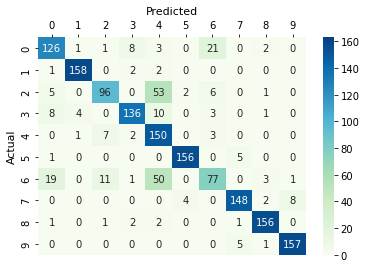

In [88]:
# Confusion Matrix
cf_matrix = confusion_matrix(y_actual, y_predict)
x = sns.heatmap(cf_matrix, vmin=0, vmax=163, annot=True,fmt="d", linewidths=0, cmap="GnBu")
x.xaxis.tick_top()
x.set_title('Predicted', size=11)
x.set_ylabel('Actual', loc="center", size=11)



Number of Misclassified Images: 236

Actual, Predicted: Frequency 
{'0, 6': 26, '2, 4': 23, '4, 2': 20, '2, 6': 16, '6, 2': 15, '6, 4': 12, '6, 0': 11, '4, 6': 10, '7, 9': 9, '3, 0': 7, '4, 3': 6, '5, 7': 5, '6, 8': 4, '6, 3': 3, '7, 8': 2, '3, 5': 1}


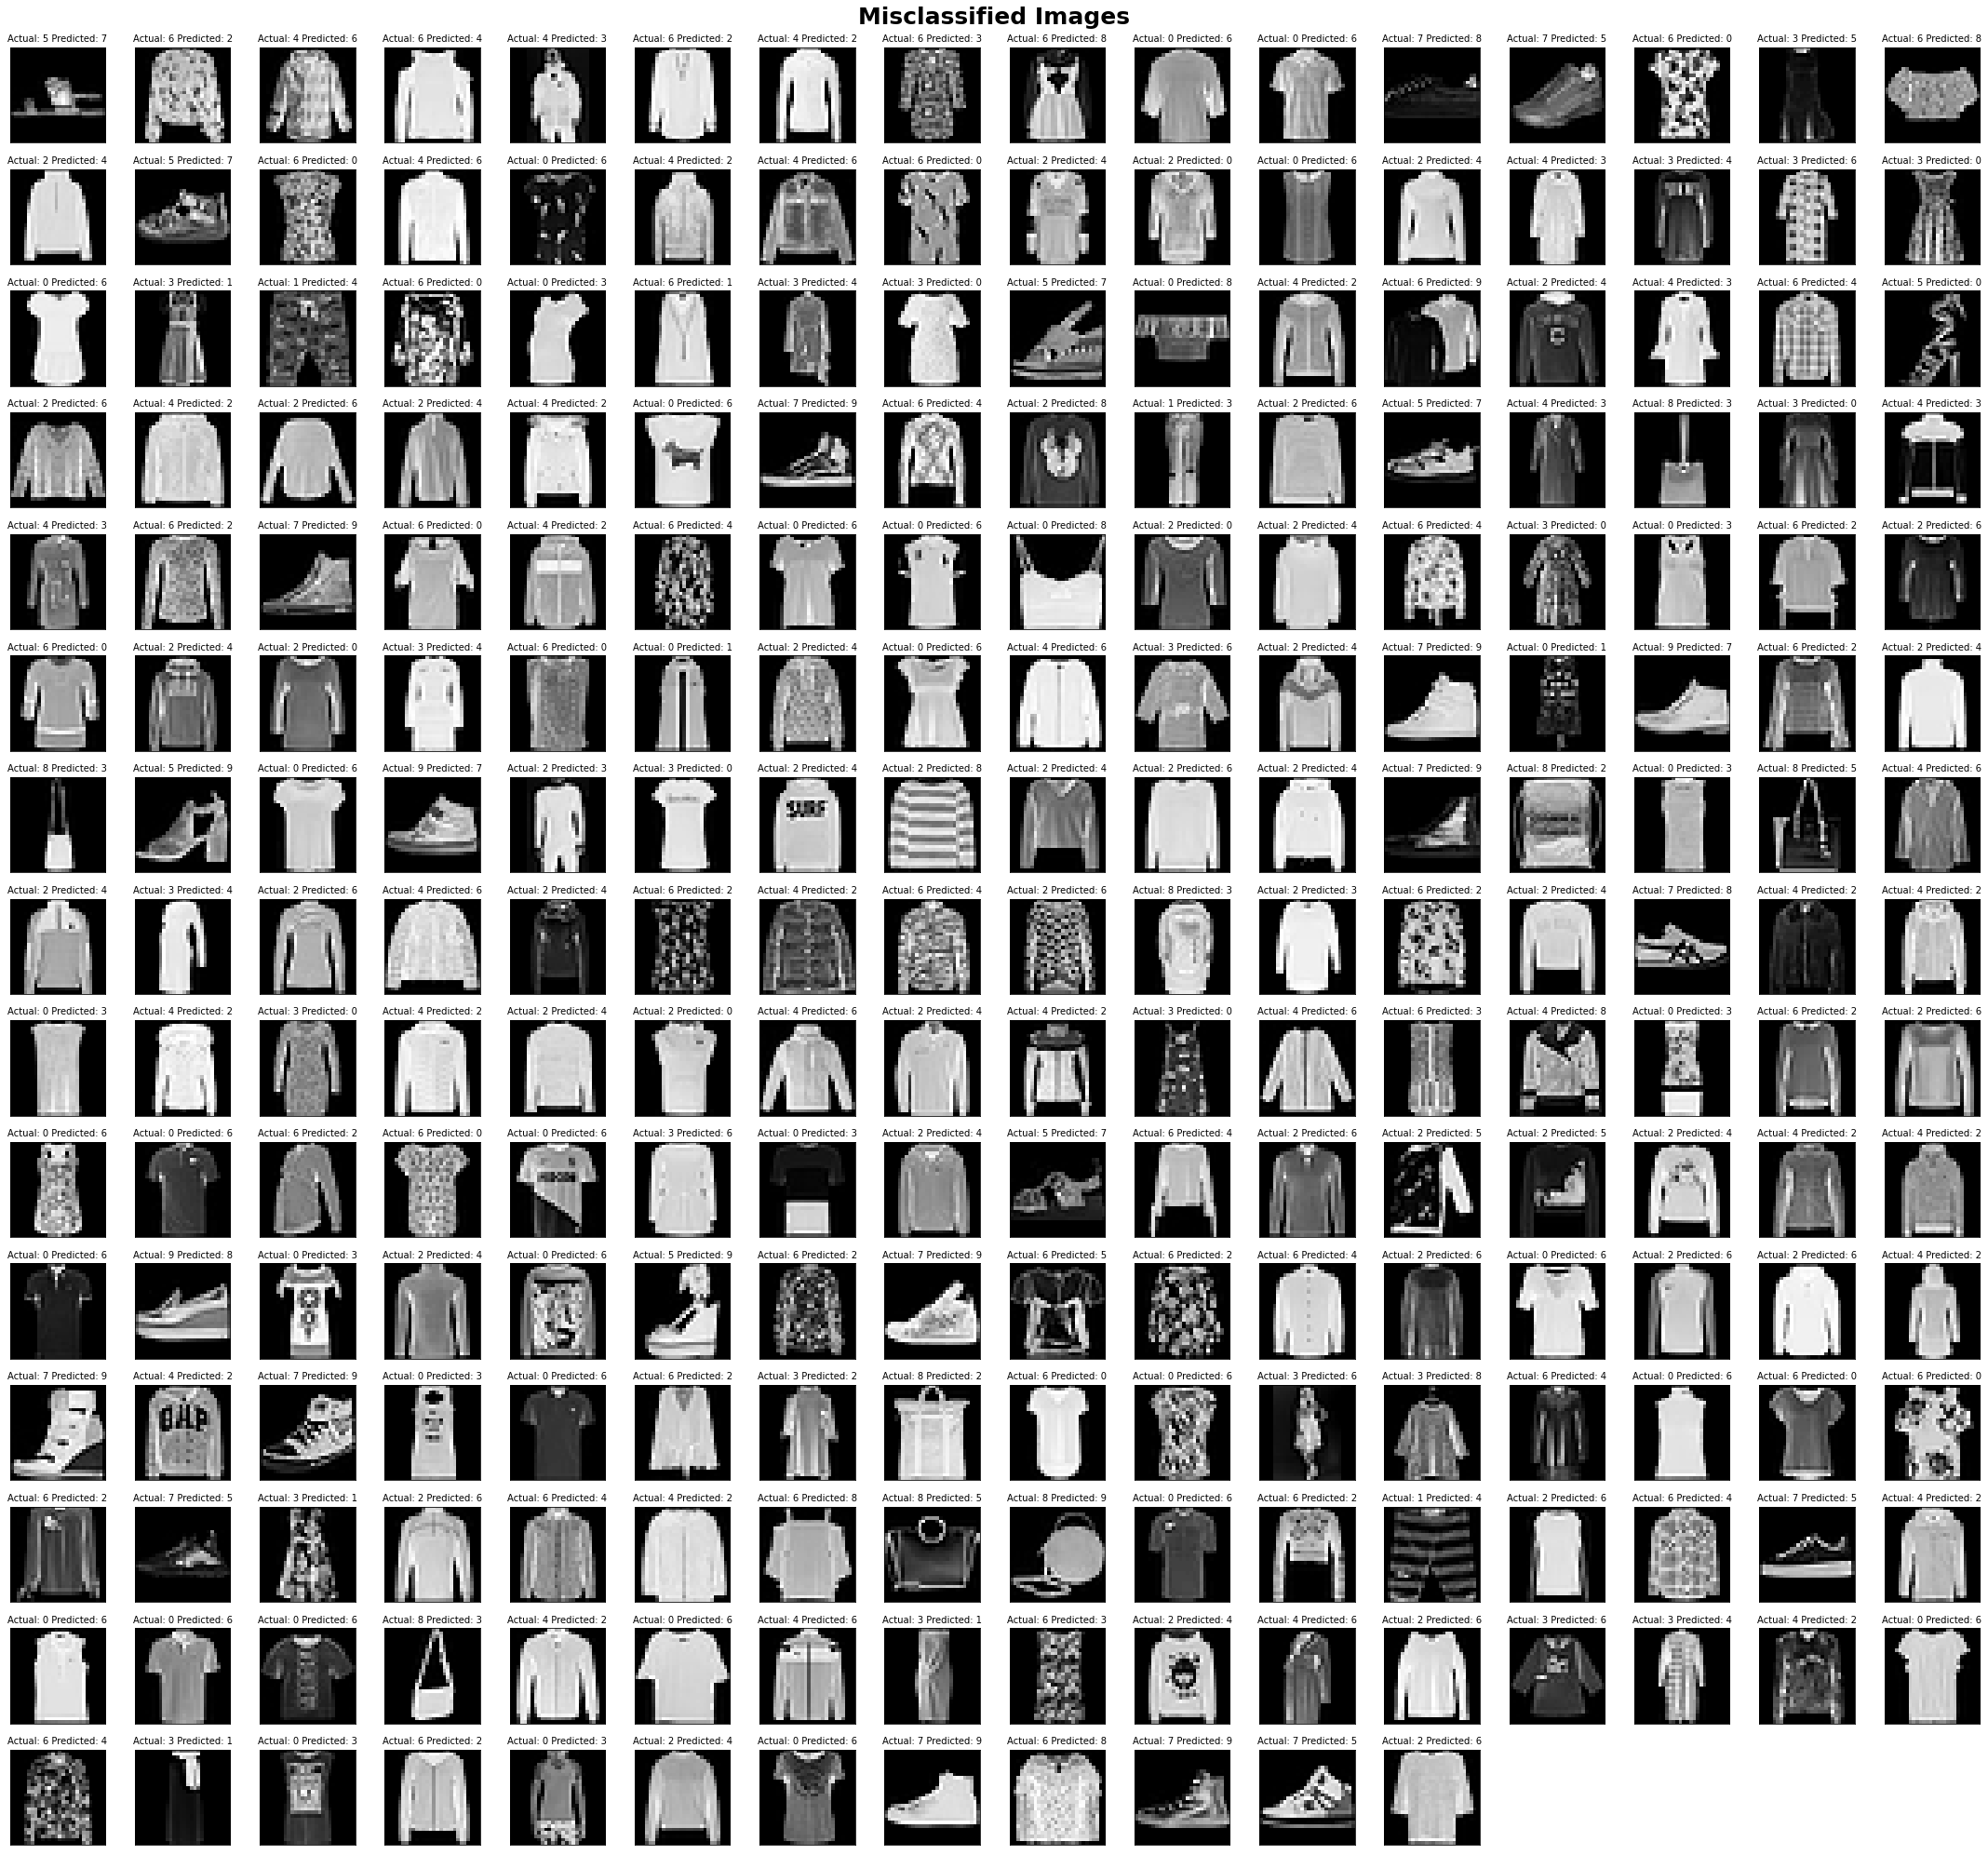

In [160]:
reshape_image = np.reshape(x_test, (len(x_test), round(math.sqrt(28*28)), round(math.sqrt(28*28))))

# Count how many misclassified images there are
count = 0
for i in range(len(prediction)):
    if np.argmax(prediction[i]) != np.argmax(y_test[i]):
        count += 1
print("Number of Misclassified Images: " + str(count))

fig = plt.figure(figsize=(30, 30))
fig.suptitle("Misclassified Images\n", fontweight="bold", fontsize=25)
fig.patch.set_facecolor('white')

image_index = 0
figure_size = 1
frequency = {}

while image_index < len(reshape_image) and figure_size < math.ceil(math.sqrt(count)) * math.ceil(math.sqrt(count)):
    if np.argmax(prediction[image_index]) != np.argmax(y_test[image_index]):
        fig.add_subplot(math.ceil(math.sqrt(count)), math.ceil(math.sqrt(count)), figure_size)
        figure_size += 1

        plt.gca().xaxis.set_visible(False)
        plt.gca().yaxis.set_visible(False)

        if str(np.argmax(y_test[image_index])) + ', '  + str(np.argmax(prediction[image_index])) in frequency.keys():
            frequency[str(np.argmax(y_test[image_index])) + ', '  + str(np.argmax(prediction[image_index]))] += 1
        else:
            frequency[str(np.argmax(y_test[image_index])) + ', '  + str(np.argmax(prediction[image_index]))] = 1
        
        title = "Actual: " + str(np.argmax(y_test[image_index])) + " Predicted: " + str(np.argmax(prediction[image_index]))
        plt.title(title, fontsize=10)
        plt.imshow(reshape_image[image_index], cmap='gray')
    image_index += 1

plt.tight_layout()
sorted_values = sorted(frequency.values(), reverse=True)
sorted_dict = {}

for i in sorted_values:
    for k in frequency.keys():
        if frequency[k] == i:
            sorted_dict[k] = frequency[k]
            break

print("\nActual, Predicted: Frequency \n" + str(sorted_dict))

plt.savefig("misclassified_images.png")